<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'match_result_test.csv',
 '1_orders_dataset.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 '1_customers_dataset.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'groceries.csv',
 'mall_customers.csv',
 '1_order_payments_dataset.csv',
 'bz_data_analyis.csv',
 'online_retail_II.xlsx',
 'sales_vs_discount.csv',
 'mock_sales_data.csv',
 'test.csv',
 'sample_data']

In [9]:
customer = pd.read_csv('1_customers_dataset.csv')[['customer_id','customer_city','customer_state']]
pay = pd.read_csv('1_order_payments_dataset.csv')[['order_id','payment_type','payment_installments','payment_value']]
order = pd.read_csv('1_orders_dataset.csv')[['order_id','customer_id','order_purchase_timestamp']]

In [12]:
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['date'] = order['order_purchase_timestamp'].to_numpy().astype('datetime64[D]')
order['week'] = order['date'] - order['date'].dt.day.astype('timedelta64[D]')
order.head()

,order_id,customer_id,order_purchase_timestamp,date,week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02,2017-09-30
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-24,2018-06-30
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08,2018-07-31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18,2017-10-31
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13,2018-01-31


In [19]:
pay.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [23]:
df = pd.merge(pd.merge(order, pay, 'left', 'order_id'), customer, 'left', 'customer_id')
df.head()

,order_id,customer_id,order_purchase_timestamp,date,week,payment_type,payment_installments,payment_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02,2017-09-30,credit_card,1.0,18.12,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02,2017-09-30,voucher,1.0,2.00,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02,2017-09-30,voucher,1.0,18.59,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-24,2018-06-30,boleto,1.0,141.46,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08,2018-07-31,credit_card,3.0,179.12,vianopolis,GO


In [26]:
df = df[['customer_id', 'date', 'week', 'payment_type', 
         'payment_installments',	'payment_value',	'customer_city',	'customer_state']]
df.columns = ['id','date','week','type','install', 'rev','city','region']
df.head()

,id,date,week,type,install,rev,city,region
0,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-09-30,credit_card,1.0,18.12,sao paulo,SP
1,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-09-30,voucher,1.0,2.00,sao paulo,SP
2,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-09-30,voucher,1.0,18.59,sao paulo,SP
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24,2018-06-30,boleto,1.0,141.46,barreiras,BA
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,2018-07-31,credit_card,3.0,179.12,vianopolis,GO


In [28]:
list_id = dict(zip(df['id'].unique(), range(len(df['id'].unique()))))

In [30]:
df = df.assign(id = df['id'].apply(lambda x : list_id.get(x,x)))
df.head()

,id,date,week,type,install,rev,city,region
0,0,2017-10-02,2017-09-30,credit_card,1.0,18.12,sao paulo,SP
1,0,2017-10-02,2017-09-30,voucher,1.0,2.00,sao paulo,SP
2,0,2017-10-02,2017-09-30,voucher,1.0,18.59,sao paulo,SP
3,1,2018-07-24,2018-06-30,boleto,1.0,141.46,barreiras,BA
4,2,2018-08-08,2018-07-31,credit_card,3.0,179.12,vianopolis,GO


In [33]:
cnt = df.groupby(['type', 'install', 'region'])['id'].count().reset_index().rename(columns = {'id':'cnt'})
cnt.head()

,type,install,region,cnt
0,boleto,1.0,AC,16
1,boleto,1.0,AL,68
2,boleto,1.0,AM,21
3,boleto,1.0,AP,20
4,boleto,1.0,BA,614


In [36]:
cnt_card = cnt[cnt['type'] == 'credit_card']
cnt_card.head()

,type,install,region,cnt
27,credit_card,0.0,BA,1
28,credit_card,0.0,SP,1
29,credit_card,1.0,AC,9
30,credit_card,1.0,AL,66
31,credit_card,1.0,AM,43


In [43]:
cnt_card = cnt_card.assign(ratio = cnt_card.groupby(['region'])['cnt'].apply(lambda x : round(x/sum(x)*100,2)),
                           install = cnt_card['install'].astype(str)
                           )
cnt_card.head()

,type,install,region,cnt,ratio
27,credit_card,0.0,BA,1,0.04
28,credit_card,0.0,SP,1,0.00
29,credit_card,1.0,AC,9,14.75
30,credit_card,1.0,AL,66,19.35
31,credit_card,1.0,AM,43,34.68


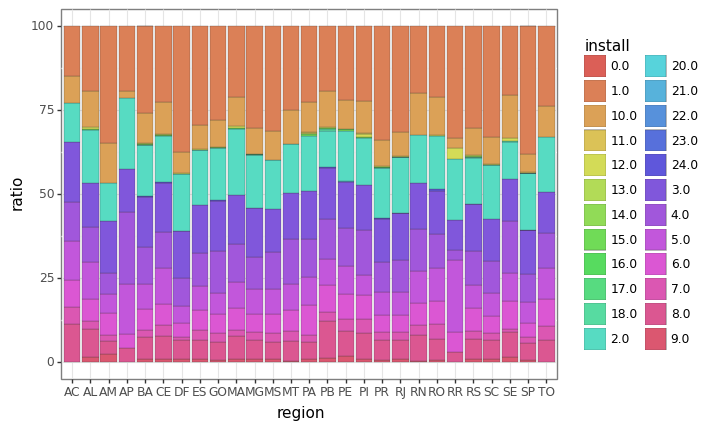

<ggplot: (8764348149029)>

In [45]:
(
    ggplot(cnt_card, aes('region', 'ratio', fill = 'install')) +
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.theme_bw()
)

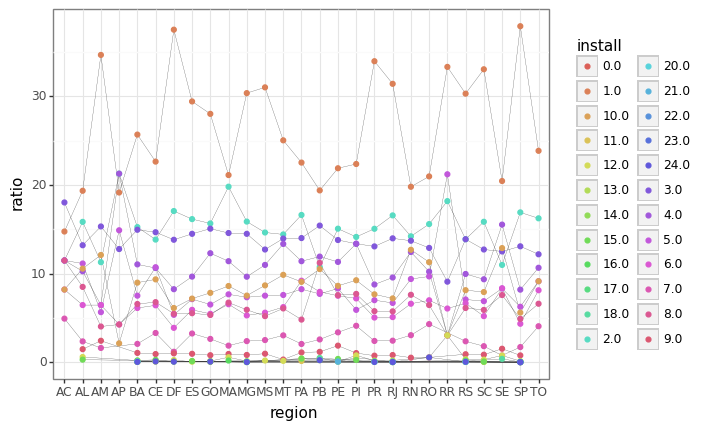

<ggplot: (8764347883165)>

In [47]:
(
    ggplot(cnt_card, aes('region', 'ratio', color = 'install', group = 'install')) +
    gg.geom_line(color = '#333333', size = 0.1) +
    gg.geom_point() +
    gg.theme_bw()
)

# Iterators

In [48]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [56]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}